In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [3]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
irisdata.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
irisdata.shape

(150, 5)

In [6]:
irisdata.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
irisdata.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [8]:
irisdata['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

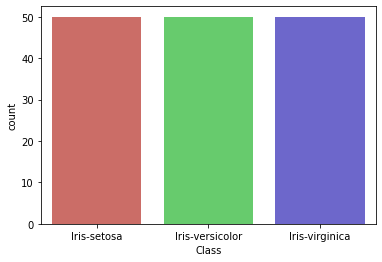

<Figure size 432x288 with 0 Axes>

In [9]:
#class distribution 
irisdata['Class'].value_counts()
sns.countplot(x='Class',data=irisdata,palette='hls')
plt.show()
plt.savefig('Class')

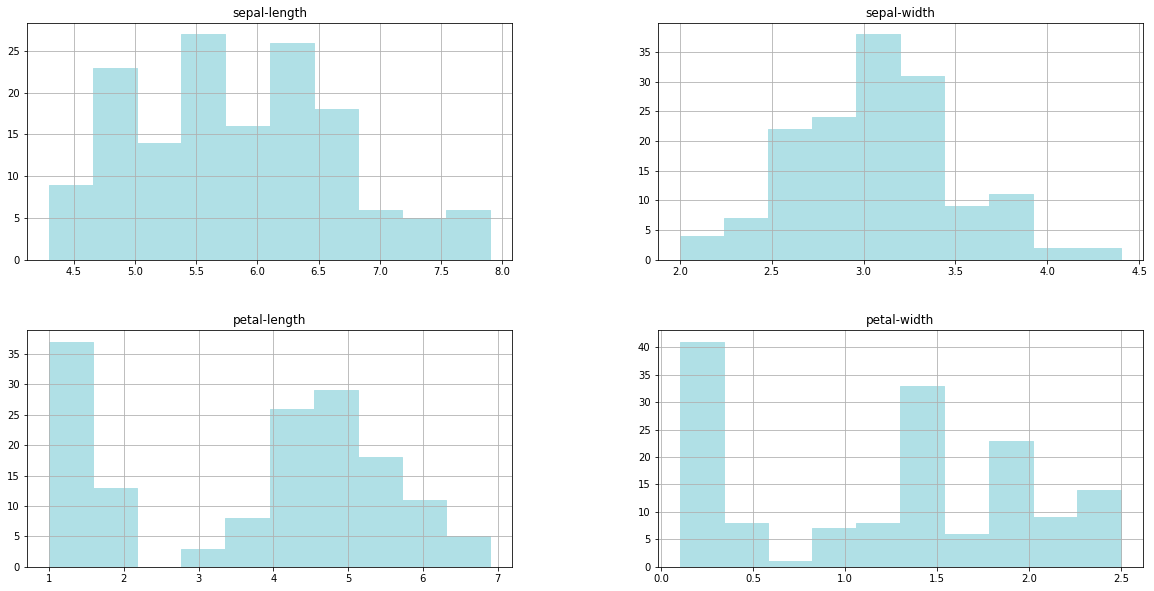

In [10]:
irisdata.hist(figsize=(20,10), edgecolor="powderblue", color="powderblue")
plt.show()

<Figure size 432x288 with 0 Axes>

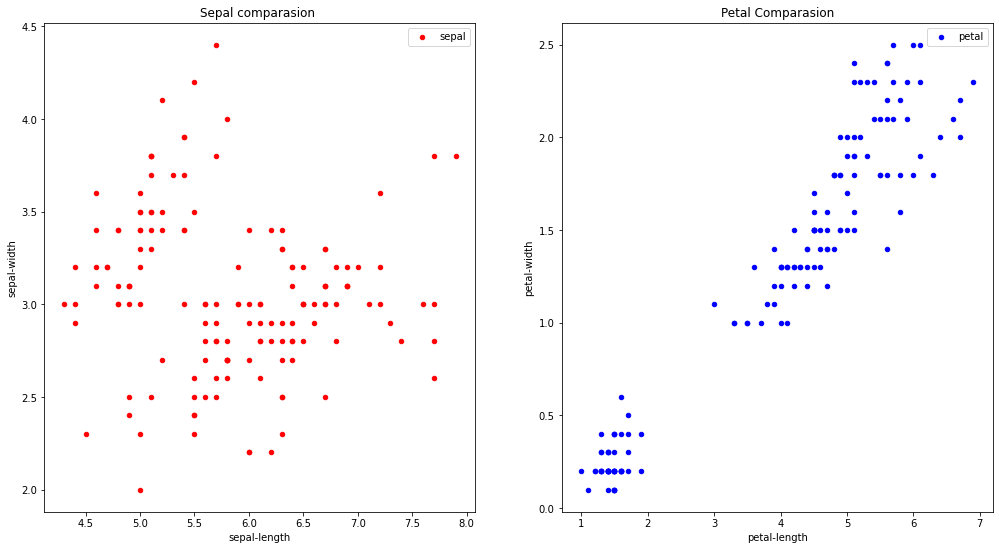

In [11]:
# Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
# warnings.simplefilter("ignore")
# Supress any warning
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
irisdata.plot(x="sepal-length",y="sepal-width",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
irisdata.plot(x="petal-length",y="petal-width",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

# we can see that  there are some petals which are smaller than rest of petal.
#Let's examine them

<Figure size 432x288 with 0 Axes>

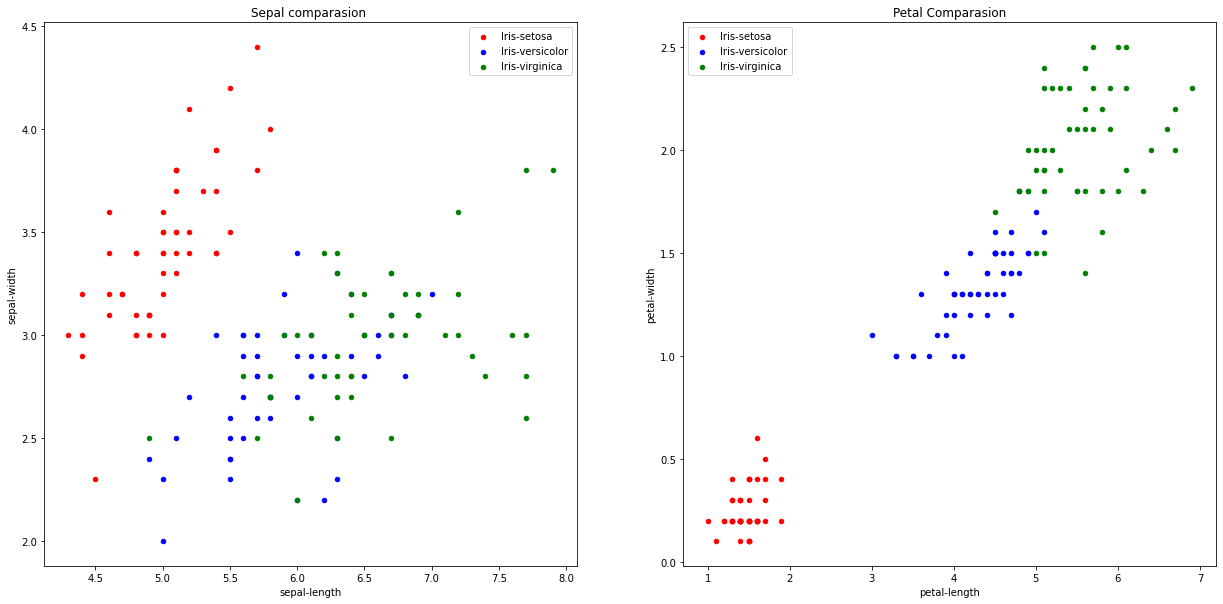

In [12]:
# for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

irisdata[irisdata['Class']=='Iris-setosa'].plot(x="sepal-length", y="sepal-width", kind="scatter",ax=ax[0],label='Iris-setosa',color='r')
irisdata[irisdata['Class']=='Iris-versicolor'].plot(x="sepal-length",y="sepal-width",kind="scatter",ax=ax[0],label='Iris-versicolor',color='b')
irisdata[irisdata['Class']=='Iris-virginica'].plot(x="sepal-length", y="sepal-width", kind="scatter", ax=ax[0], label='Iris-virginica', color='g')

irisdata[irisdata['Class']=='Iris-setosa'].plot(x="petal-length", y="petal-width", kind="scatter",ax=ax[1],label='Iris-setosa',color='r')
irisdata[irisdata['Class']=='Iris-versicolor'].plot(x="petal-length",y="petal-width",kind="scatter",ax=ax[1],label='Iris-versicolor',color='b')
irisdata[irisdata['Class']=='Iris-virginica'].plot(x="petal-length", y="petal-width", kind="scatter", ax=ax[1], label='Iris-virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

# plt.show()
# plt.close()

# satosa   - satosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
# versicolor & virginica are also separable in Petal comprasion
# satoa sepal are smallest in length and largest in Width than other species

In [13]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [14]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

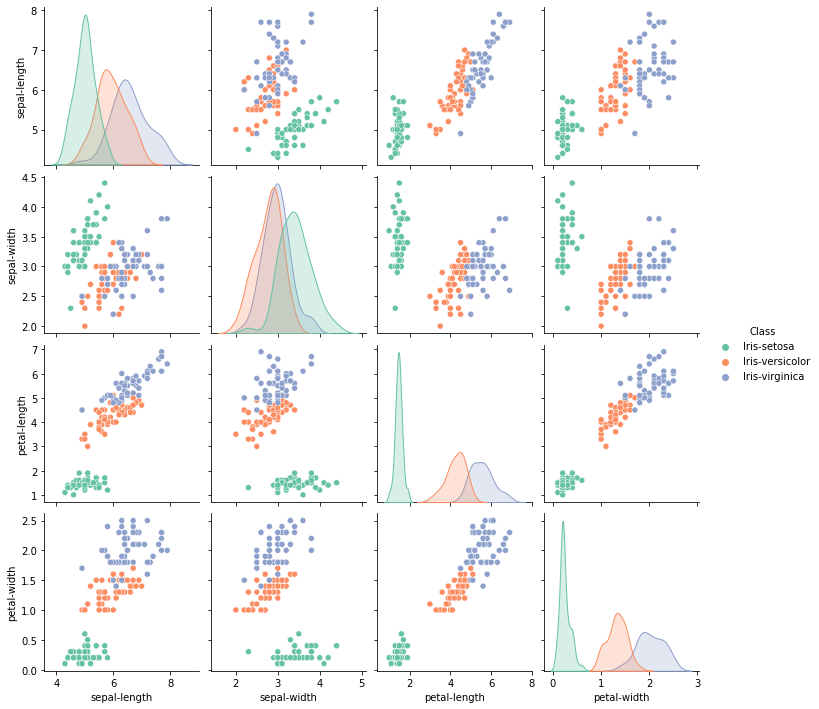

In [16]:
sns.pairplot(data=irisdata, hue='Class', palette='Set2')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
X_test

,sepal-length,sepal-width,petal-length,petal-width
29,4.7,3.2,1.6,0.2
149,5.9,3.0,5.1,1.8
18,5.7,3.8,1.7,0.3
96,5.7,2.9,4.2,1.3
63,6.1,2.9,4.7,1.4
132,6.4,2.8,5.6,2.2
135,7.7,3.0,6.1,2.3
140,6.7,3.1,5.6,2.4
121,5.6,2.8,4.9,2.0
32,5.2,4.1,1.5,0.1


In [19]:
y_test

29         Iris-setosa
149     Iris-virginica
18         Iris-setosa
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
135     Iris-virginica
140     Iris-virginica
121     Iris-virginica
32         Iris-setosa
100     Iris-virginica
120     Iris-virginica
55     Iris-versicolor
123     Iris-virginica
10         Iris-setosa
0          Iris-setosa
83     Iris-versicolor
4          Iris-setosa
36         Iris-setosa
14         Iris-setosa
51     Iris-versicolor
91     Iris-versicolor
13         Iris-setosa
82     Iris-versicolor
17         Iris-setosa
90     Iris-versicolor
129     Iris-virginica
77     Iris-versicolor
116     Iris-virginica
48         Iris-setosa
Name: Class, dtype: object

**Using Linear Kernel**

In [42]:
svclassifier = SVC(kernel='linear', gamma='scale')
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='linear')

In [43]:
y_pred_lnr = svclassifier.predict(X_test)

In [44]:
y_pred_lnr

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Linear Kernal of SVC")
print("Accuracy = ", accuracy_score(y_test, y_pred_lnr))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_lnr))
print("\nClassification Report")
print(classification_report(y_test, y_pred_lnr))

Linear Kernal of SVC
Accuracy =  0.9666666666666667

Confusion Matrix
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Using Polynomial Kernel**

In [47]:
svclassifier = SVC(kernel='poly', degree=8, gamma='scale')
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [48]:
y_pred_poly = svclassifier.predict(X_test)

In [49]:
y_pred_poly

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Polynomial Kernal of SVC")
print("Accuracy = ", accuracy_score(y_test, y_pred_poly))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_poly))
print("\nClassification Report")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernal of SVC
Accuracy =  0.9666666666666667

Confusion Matrix
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Using RBF Kernel**

In [64]:
svclassifier = SVC(kernel='rbf', gamma='scale')
svclassifier.fit(X_train, y_train)

SVC(degree=8)

In [65]:
y_pred_rbf = svclassifier.predict(X_test)

In [66]:
y_pred_rbf

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [67]:
print("RBF Kernal of SVC")
print("Accuracy = ", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report")
print(classification_report(y_test, y_pred_rbf))

RBF Kernal of SVC
Accuracy =  0.9333333333333333

Confusion Matrix
[[11  0  0]
 [ 0  7  2]
 [ 0  0 10]]

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [68]:
# Using Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid', gamma='scale')
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='sigmoid')

In [69]:
y_pred_sig = svclassifier.predict(X_test)

In [70]:
y_pred_sig

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [71]:
print("Sigmoid Kernal of SVC")
print("Accuracy = ", accuracy_score(y_test, y_pred_sig))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_sig))
print("\nClassification Report")
print(classification_report(y_test, y_pred_sig))

Sigmoid Kernal of SVC
Accuracy =  0.3

Confusion Matrix
[[ 0 11  0]
 [ 0  9  0]
 [ 0 10  0]]

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.30      1.00      0.46         9
 Iris-virginica       0.00      0.00      0.00        10

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



Comparison of Kernel Performance.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary 
classification problems. However, in our case we had three output classes.

However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

**Grid Search with CV**

In [75]:
from sklearn.model_selection import GridSearchCV
from numpy import arange
model_svc= SVC()


parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 1000, 10)
parameters['gamma'] = arange(1e-4, 1, 10)
parameters['degree'] = arange(1, 10, 1)
parameters['class_weight'] = ['dict', 'balanced']
parameters['random_state'] = arange(1, 10, 1)

## Building Grid Search algorithm with cross-validation and acc score.

grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

grid_search_svc.fit(X_train,y_train)
best_parameters_svc = grid_search_svc.best_params_  
best_score_svc = grid_search_svc.best_score_ 
print(best_parameters_svc)
print(best_score_svc)

y_pred=grid_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("SVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))

{'C': 1, 'class_weight': 'balanced', 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear', 'random_state': 1}
0.9833333333333334
SVM - Accuracy: 96.667.
SVM - Precision: 0.967.
SVM - Recall: 0.967.
SVM - F1_Score: 0.967.


In [77]:
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [76]:
print("\nClassification Report")
print(classification_report(y_test, y_pred))


Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

